In [520]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA as sklearn_pca
import locale
from locale import atof
import warnings
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import f_regression
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import xlrd
from sklearn import ensemble
import time

In [521]:
# Import FBI Raw Data

fbidata = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv', delimiter=",", thousands=',',decimal=".")
fbiraw = pd.DataFrame(fbidata)
fbiraw.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [522]:
#Transform FBI Raw Data
#Rename columns with row 3 from the original data set
fbiraw_t1 = fbiraw.rename(columns=fbiraw.iloc[3])

#Delete first three rows don´t contain data for the regression model
fbiraw_t2 = fbiraw_t1.drop(fbiraw_t1.index[0:4])

In [523]:
#Delete column "Rape (revised definition)1 as it contains no data
fbiraw_t2 = fbiraw_t2.drop('Rape\n(revised\ndefinition)1', axis = 1)

In [524]:
#Delete Arson Column as there is insufficient data
# 'The FBI does not publish arson data unless it receives data from either the agency or the state
#  for all 12 months of the calendar year.'
fbiraw_t2 = fbiraw_t2.drop('Arson3', axis = 1)

In [525]:
#Clean tail from the data set

#Re-shape dataset excluding the last 3 rows of the dataset as they don´t contain relevant information for the model
fbiraw_t2 = fbiraw_t2[:-3]

#Change names in Columns
fbiraw_t2= fbiraw_t2.rename(columns={'Violent\ncrime': 'Violent Crime', 'Murder and\nnonnegligent\nmanslaughter': 'Murder','Rape\n(legacy\ndefinition)2': 'Rape', 'Robbery': 'Robbery', 'Aggravated\nassault': 'Assault', 'Property\ncrime': 'PropertyCrime', 'Burglary': 'Burglary', 'Larceny-\ntheft': 'Larceny & Theft', 'Motor\nvehicle\ntheft': 'MotorVehicleTheft'})

In [526]:
#Analyse missing information
fbiraw_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 4 to 351
Data columns (total 11 columns):
City                 348 non-null object
Population           348 non-null object
Violent Crime        348 non-null object
Murder               348 non-null object
Rape                 348 non-null object
Robbery              348 non-null object
Assault              348 non-null object
PropertyCrime        348 non-null object
Burglary             348 non-null object
Larceny & Theft      348 non-null object
MotorVehicleTheft    348 non-null object
dtypes: object(11)
memory usage: 32.6+ KB


In [527]:
#Change all columns from object to float
locale.setlocale(locale.LC_NUMERIC, '')
fbiraw_t2['Population'] = fbiraw_t2['Population'].apply(atof)
fbiraw_t2['Violent Crime'] = fbiraw_t2['Violent Crime'].apply(atof)
fbiraw_t2['Murder'] = fbiraw_t2['Murder'].apply(atof)
fbiraw_t2['Rape'] = fbiraw_t2['Rape'].apply(atof)
fbiraw_t2['Robbery'] = fbiraw_t2['Robbery'].apply(atof)
fbiraw_t2['Assault'] = fbiraw_t2['Assault'].apply(atof)
fbiraw_t2['PropertyCrime'] = fbiraw_t2['PropertyCrime'].apply(atof)
fbiraw_t2['Burglary'] = fbiraw_t2['Burglary'].apply(atof)
fbiraw_t2['Larceny & Theft'] = fbiraw_t2['Larceny & Theft'].apply(atof)
fbiraw_t2['MotorVehicleTheft'] = fbiraw_t2['MotorVehicleTheft'].apply(atof)
fbiraw_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 4 to 351
Data columns (total 11 columns):
City                 348 non-null object
Population           348 non-null float64
Violent Crime        348 non-null float64
Murder               348 non-null float64
Rape                 348 non-null float64
Robbery              348 non-null float64
Assault              348 non-null float64
PropertyCrime        348 non-null float64
Burglary             348 non-null float64
Larceny & Theft      348 non-null float64
MotorVehicleTheft    348 non-null float64
dtypes: float64(10), object(1)
memory usage: 32.6+ KB


In [528]:
#Reindex the dataframe

fbiraw_t3 = fbiraw_t2.reset_index(drop=True)
fbiraw_t2.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,PropertyCrime,Burglary,Larceny & Theft,MotorVehicleTheft
4,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0
5,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0
6,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0
7,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0
8,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0


In [529]:
#Extract only the columns that are needed

fbiraw_t3 = fbiraw_t2

In [530]:
#Convert Robbery into a categorical feature

fbiraw_t3.loc[fbiraw_t3['Robbery'] > 0, 'Robbery'] = 1

In [531]:
#Convert Murder into a categorical feature

fbiraw_t3.loc[fbiraw_t3['Murder'] > 0, 'Murder'] = 1

In [532]:
#Transform dataset into final dataset with features

fbidata = fbiraw_t3.drop('City',axis=1)

In [533]:
# Set up the Random Forest Model
rfc = ensemble.RandomForestClassifier()
X = fbidata.drop(['Robbery'], 1)
Y = fbidata['Robbery']
X = pd.get_dummies(X)

In [534]:
# Make the correlation matrix

corrmat = X.corr()
print(corrmat)

                   Population  Violent Crime    Murder      Rape   Assault  \
Population           1.000000       0.998854  0.162309  0.990839  0.999134   
Violent Crime        0.998854       1.000000  0.165904  0.994985  0.999942   
Murder               0.162309       0.165904  1.000000  0.201359  0.163747   
Rape                 0.990839       0.994985  0.201359  1.000000  0.994140   
Assault              0.999134       0.999942  0.163747  0.994140  1.000000   
PropertyCrime        0.996265       0.998059  0.190670  0.997843  0.997622   
Burglary             0.970578       0.978150  0.240979  0.992442  0.976288   
Larceny & Theft      0.997946       0.998762  0.182823  0.996260  0.998561   
MotorVehicleTheft    0.992421       0.996271  0.191807  0.998764  0.995403   

                   PropertyCrime  Burglary  Larceny & Theft  MotorVehicleTheft  
Population              0.996265  0.970578         0.997946           0.992421  
Violent Crime           0.998059  0.978150         0.9987

In [535]:
# Set up the timer to calculate simplicity of the Random Forest
start_time = time.clock()

In [536]:
# Calculate accuracy of the Random Forest
cross_val_score(rfc, X, Y, cv=20).mean()

0.81680964052287575

In [537]:
# Calculate Simplicity of the Random Forest
trfc = time.clock() - start_time
print (trfc, "seconds")

0.3244648806501118 seconds


In [538]:
# Set up the timer to calculate simplicity of the tree
start_time1 = time.clock()

In [539]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 0
)
decision_tree.fit(X, Y)

# Calculate accuracy of the tree
cross_val_score(decision_tree, X, Y, cv=20).mean()

0.84783496732026153

In [540]:
# Calculate Simplicity of Tree
ttree = time.clock() - start_time1
print (ttree, "seconds")

0.08100563344942202 seconds


In [541]:
#Print Simplicity of Random Forest and Tree
print('Simplicity Random Forest:', trfc)
print('Simplicity Tree:', ttree)
ratio =  trfc/ttree
print('Ratio Random Forest/Tree:', ratio)

Simplicity Random Forest: 0.3244648806501118
Simplicity Tree: 0.08100563344942202
Ratio Random Forest/Tree: 4.005460692467764


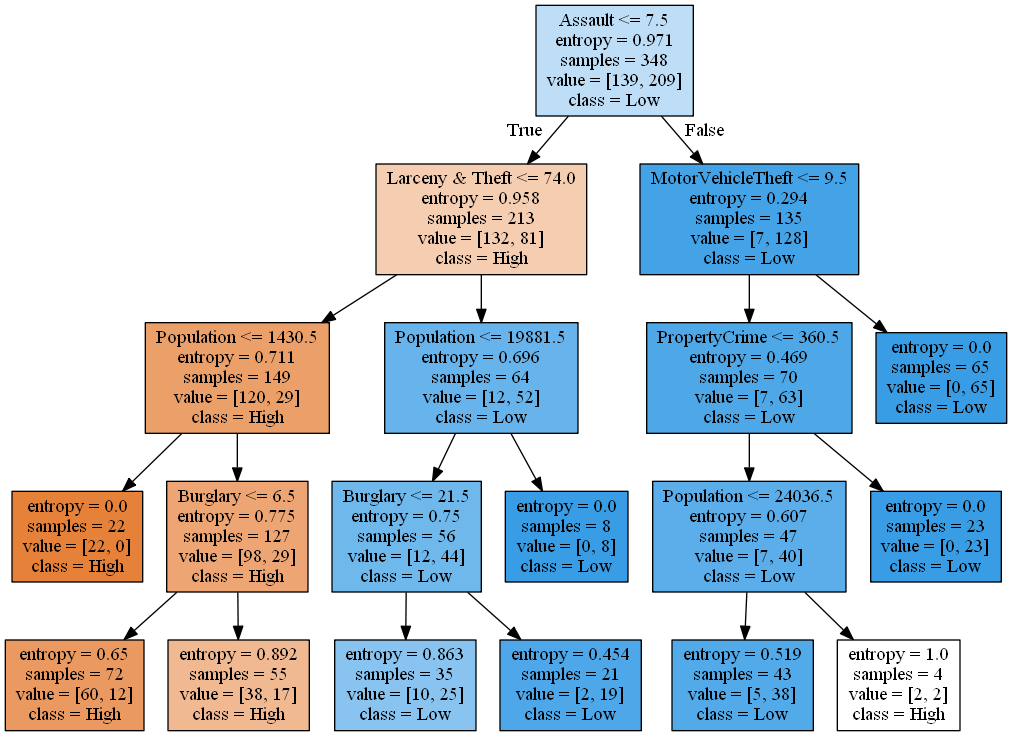

In [542]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['High', 'Low'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())